## AutoEncoders on Image Data (Vanilla Autoencoder & Multilayer autoencoder )

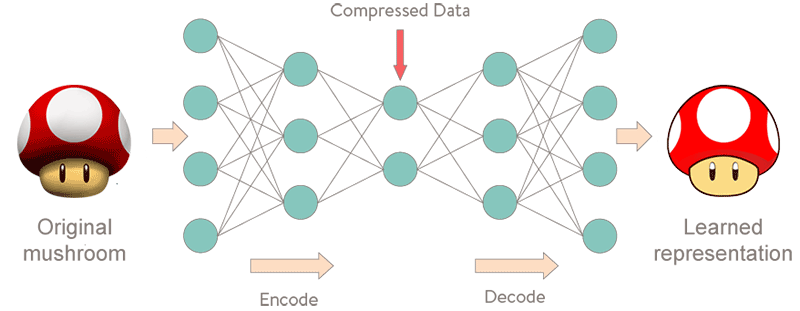

### AutoEncoders

An autoencoder neural network is an Unsupervised Machine learning algorithm that applies backpropagation, setting the target values to be equal to the inputs. Autoencoders are used to reduce the size of our inputs into a smaller representation. If anyone needs the original data, they can reconstruct it from the compressed data.



An autoencoder can learn non-linear transformations with a non-linear activation function and multiple layers.
It doesn’t have to learn dense layers. It can use convolutional layers to learn which is better for video, image and series data.
It is more efficient to learn several layers with an autoencoder rather than learn one huge transformation with PCA.
An autoencoder provides a representation of each layer as the output.
It can make use of pre-trained layers from another model to apply transfer learning to enhance the encoder/decoder.

An autoencoder consists of two primary components:

- __Encoder__: Learns to compress (reduce) the input data into an encoded representation.
- __Decoder__: Learns to reconstruct the original data from the encoded representation to be as close to the original input as possible.
- __Bottleneck__: The layer that contains the compressed representation of the input data.
- __Reconstruction loss__: The method to that measures how well the decoder is performing, i.e. measures the difference between the encoded and decoded vectors.

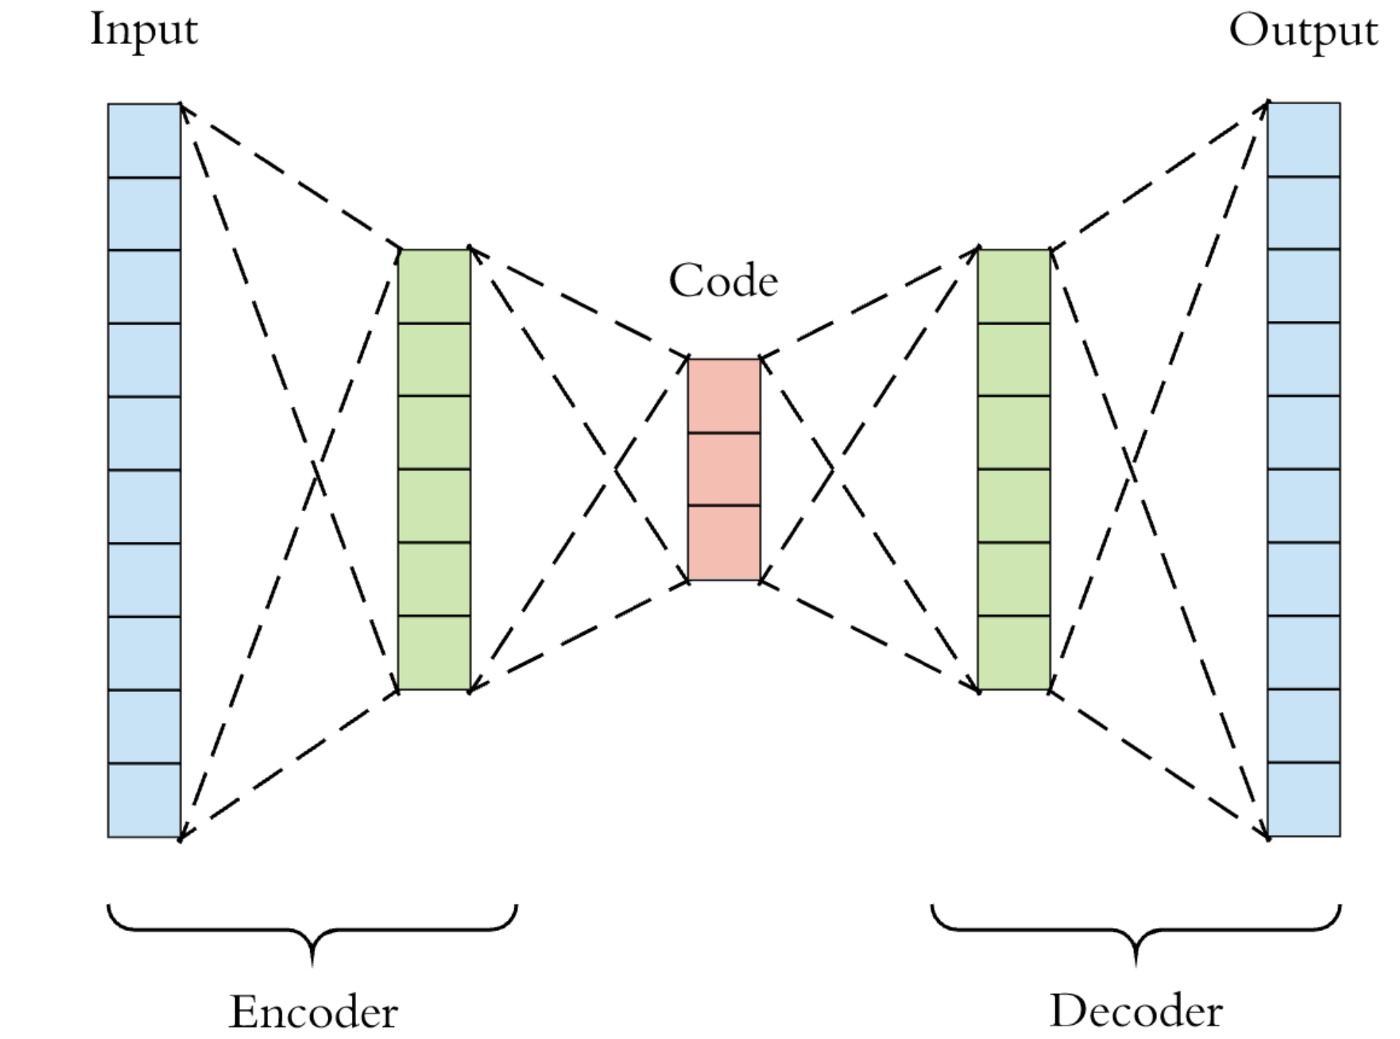

There are, basically,diffent types autoencoders:
- Vanilla autoencoders
- Multilayer autoencoder
- Denoising autoencoder
- Sparse Autoencoder
- Deep Autoencoder
- Contractive Autoencoder
- Undercomplete Autoencoder
- Convolutional Autoencoder
- Variational Autoencoder

https://sci2lab.github.io/ml_tutorial/autoencoder/#What-are-Autoencoders?

# Vanilla autoencoders

In [83]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, add
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

## Load the data

In [84]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

## Normalize the data

In [85]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


##Flatten the images for the Fully-Connected Networks

In [86]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

## Vanilla Autoencoder

In [103]:
inputs = Input(shape=(784,))
hiddens = Dense(64, activation='relu')(inputs)
outputs = Dense(784, activation='sigmoid')(hiddens)
autoencoder = Model(inputs=inputs, outputs=outputs)
autoencoder.compile(optimizer='adam', loss='mse')

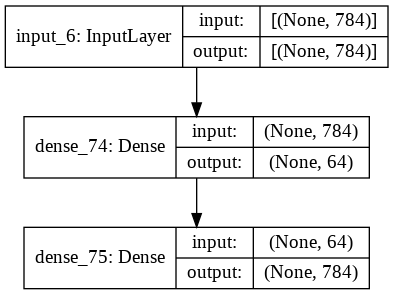

In [101]:
tf.keras.utils.plot_model(autoencoder, "multi_input_and_output_model.png", show_shapes=True)

In [104]:
epochs = 10
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0444 - val_loss: 0.0221
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0169 - val_loss: 0.0124
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0105 - val_loss: 0.0084
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0075 - val_loss: 0.0064
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0061 - val_loss: 0.0054
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0053 - val_loss: 0.0048
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0049 - val_loss: 0.0045
Epoch 8/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 9/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0043 - val_loss: 0.0042

## Predict on the test set

In [105]:
decoded_imgs = autoencoder.predict(X_test)

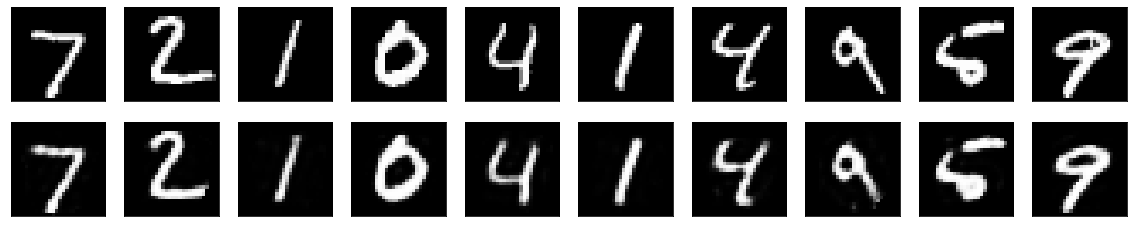

In [107]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [110]:
def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(15,10))

        # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label=' training data')
    plt.plot(history.history['val_loss'],'ro--' , label='validation data')
    plt.title('model Loss ')
    plt.ylabel('Loss value')
    plt.xlabel('No. epoch')
    plt.legend(loc="upper left")
    plt.show()


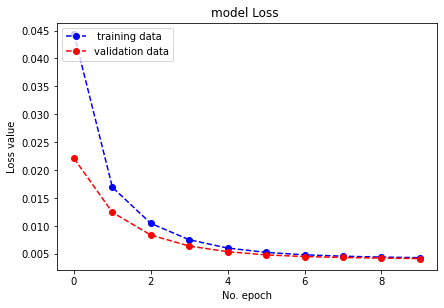

In [111]:
plot_accuracy_loss(history)

# Multilayer autoencoder

In [112]:
input_size = 784
hidden_size = 128
code_size = 64

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

In [114]:
epochs = 10
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0080 - val_loss: 0.0073
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0074 - val_loss: 0.0069
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0069 - val_loss: 0.0065
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0065 - val_loss: 0.0062
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0063 - val_loss: 0.0060
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0061 - val_loss: 0.0058
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 10/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0053 - val_loss: 0.0051

In [115]:
decoded_imgs = autoencoder.predict(X_test)

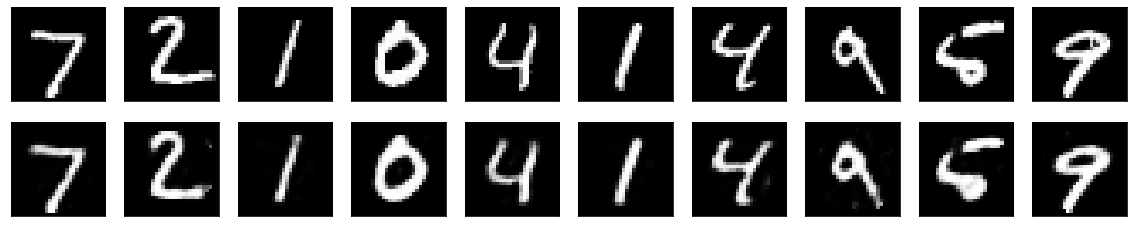

In [116]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

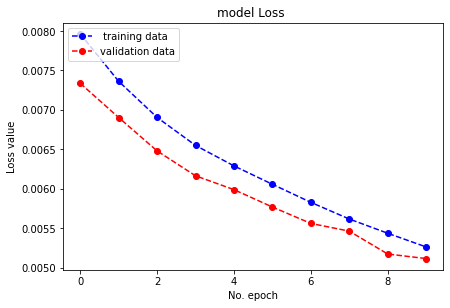

In [117]:
plot_accuracy_loss(history)